In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.colors as colors

import seaborn as sns
sns.set(context="poster", style="ticks", font_scale=1.4)

import numpy as np
import pandas as pd

import astropy

In [2]:
df_COSMOS = pd.read_sql_table("COSMOS", "sqlite:///COSMOS_reference.sqlite")

# filter out bad objects
df_COSMOS = df_COSMOS[df_COSMOS["photo_z"] > 0]
df_COSMOS = df_COSMOS[df_COSMOS["photo_z"] < 8]

df_COSMOS = df_COSMOS[df_COSMOS["mass_med"] > 0]


In [3]:
df_COSMOS.head()

,id,alpha,delta,flag_Capak,flag_UVISTA,flag_deep,flag_shallow,photo_z,classification,mass_med,mass_med_min68,mass_med_max68
216438,216439,149.697606,1.616639,0,0,0,0.0,0.0386,1,7.74447,7.61479,8.19060
218603,218604,149.749393,1.618068,0,0,0,0.0,0.3797,0,11.07610,11.00020,11.12550
219019,219020,150.125093,1.616900,0,0,0,0.0,0.1600,1,10.90000,10.86600,10.93410
219655,219656,150.388349,1.614538,0,0,0,0.0,2.3343,1,8.99275,8.82478,9.12685
219656,219657,150.383607,1.614532,0,0,0,0.0,1.3916,1,8.51774,7.95630,9.01445


In [4]:
df_COSMOS.describe()

,id,alpha,delta,flag_Capak,flag_UVISTA,flag_deep,flag_shallow,photo_z,classification,mass_med,mass_med_min68,mass_med_max68
count,518331.000000,518331.000000,518331.000000,518331.0,518331.0,518331.000000,518331.000000,518331.000000,518331.000000,518331.000000,518331.000000,518331.000000
mean,615457.013908,150.072394,2.232306,0.0,0.0,0.356195,0.325722,1.501246,0.947572,8.932841,8.778190,9.063062
std,219034.343293,0.381040,0.336753,0.0,0.0,0.478874,0.468645,1.056322,0.222889,0.924280,1.247627,1.204603
min,216439.000000,149.411366,1.614532,0.0,0.0,0.000000,0.000000,0.005000,0.000000,4.064430,-99.000000,-99.000000
25%,433451.000000,149.750004,1.954606,0.0,0.0,0.000000,0.000000,0.698100,1.000000,8.324890,8.130915,8.494390
50%,610922.000000,150.073257,2.228252,0.0,0.0,0.000000,0.000000,1.225400,1.000000,8.952890,8.791550,9.091950
75%,805861.500000,150.388587,2.523300,0.0,0.0,1.000000,1.000000,2.073100,1.000000,9.548460,9.422860,9.655005
max,995746.000000,150.786592,2.814121,0.0,0.0,1.000000,1.000000,5.994900,1.000000,12.316700,12.254600,13.066000


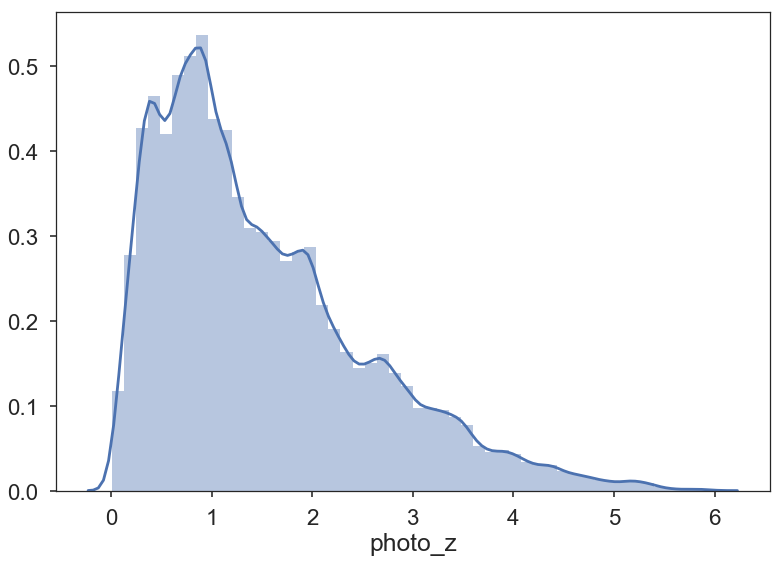

In [5]:
sns.distplot(df_COSMOS.photo_z)

In [6]:
downsample_factor = 10
mask_COSMOS_downsample = (df_COSMOS.index % downsample_factor == 0)

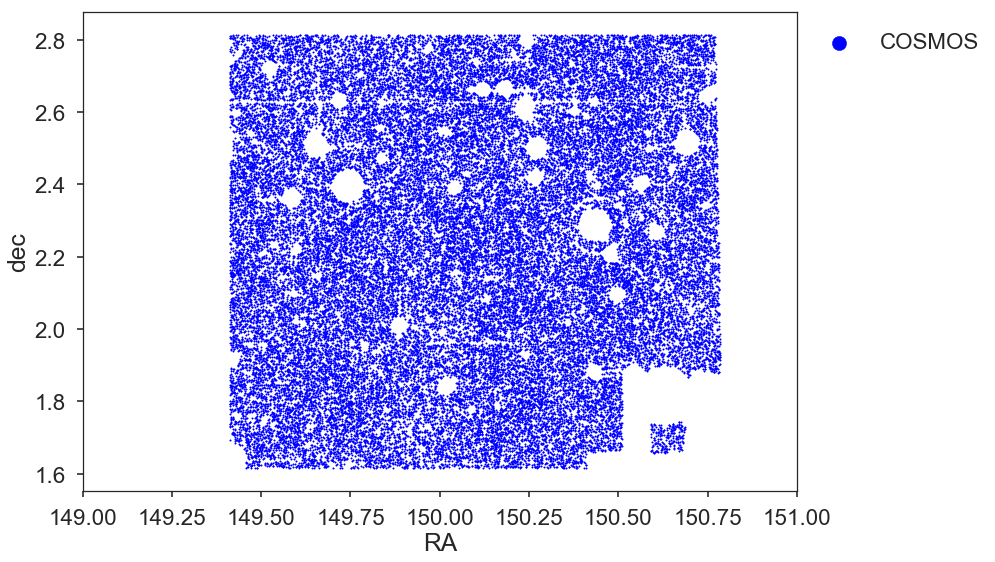

In [7]:
plt.scatter(df_COSMOS.alpha[mask_COSMOS_downsample], df_COSMOS.delta[mask_COSMOS_downsample],
           label ="COSMOS", color="b", s=2)

plt.xlabel("RA")
plt.ylabel("dec")

plt.xlim(149, 151)

plt.legend(loc="upper left", bbox_to_anchor=(1, 1), 
          markerscale=10)


# HSC Data

As far as I can tell, none of the files sent by Josh / Alexie actually have HSC galaxies with ra + dec attached. (Jinsoo used `../catalogs/HSC_6.20.fits`). Maybe it's in Josh's pickled [frankenz data](https://github.com/joshspeagle/frankenz), but the portability issues of pickling mean my computer can't read that file.

In [8]:
# pickle.load(open("../from_josh/frankenz/data/mock_hsc_cosmos_bpz.p", "rb"))

Fortunately, HSC (data release 1) is publically available now ([link to database](https://hsc-release.mtk.nao.ac.jp/doc/index.php/database/)).  So I just downloaded the COSMOS Wide stack (median seeing) dataset (`SELECT object_id, ra, dec from pdr1_cosmos_widedepth_median.forced`)

### Okay, lets do this for real

In [9]:
df_HSC = pd.read_sql_table("table_1",  "sqlite:///HSC_COSMOS_median_forced.sqlite3")
df_HSC.head()

,object_id,ra,dec
0,43158034708430849,150.897479,1.688999
1,43158034708430850,150.898466,1.689690
2,43158034708430851,150.899683,1.691651
3,43158034708430852,150.900281,1.691985
4,43158034708430853,150.903878,1.697209


In [10]:
downsample_factor = 10
mask_HSC_downsample = (df_HSC.index % downsample_factor == 0)

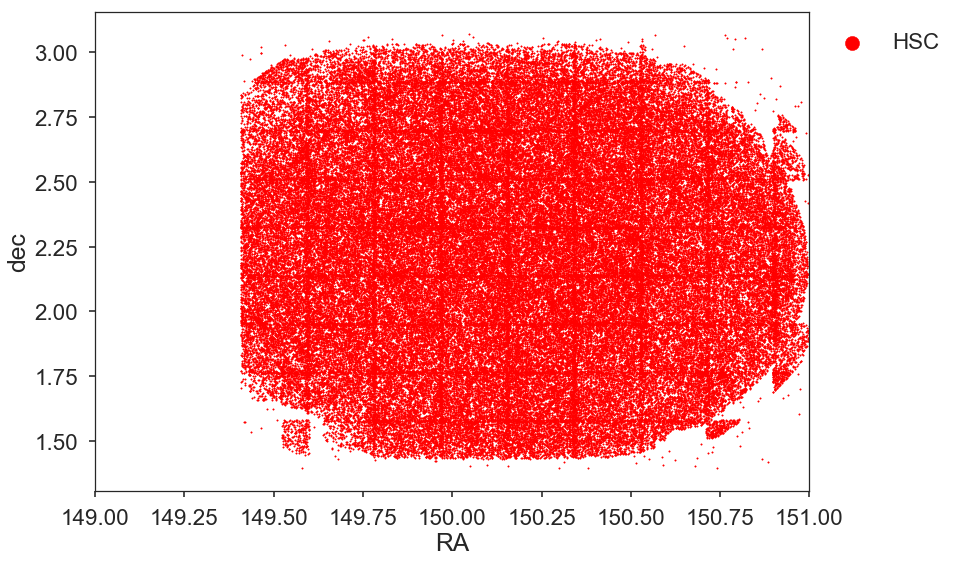

In [11]:
plt.scatter(df_HSC.ra[mask_HSC_downsample], df_HSC.dec[mask_HSC_downsample],
           label ="HSC", color="r", s=2)

plt.xlabel("RA")
plt.ylabel("dec")

plt.xlim(149, 151)

plt.legend(loc="upper left", bbox_to_anchor=(1, 1), 
          markerscale=10)


# Plot both datasets

In [12]:
downsample_factor_COSMOS = 30
mask_COSMOS_downsample = (df_COSMOS.index % downsample_factor_COSMOS == 0)

downsample_factor_HSC = 30*2
mask_HSC_downsample = (df_HSC.index % downsample_factor_HSC == 0)

print("Number of COSMOS galaxies to plot: ", mask_COSMOS_downsample.sum())
print("Number of HSC galaxies to plot:    ", mask_HSC_downsample.sum())

Number of COSMOS galaxies to plot:  17227
Number of HSC galaxies to plot:     21059


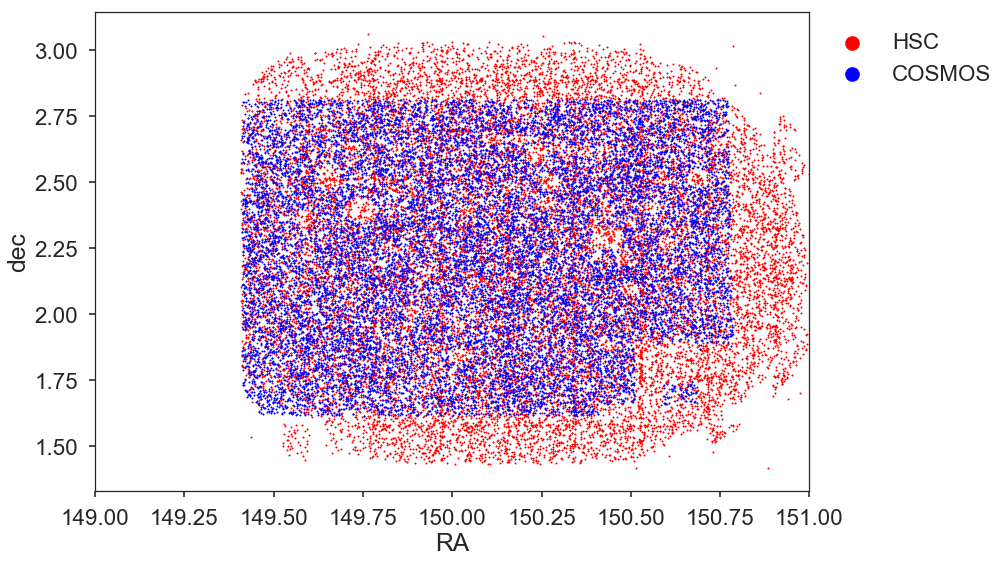

In [13]:
plt.scatter(df_HSC.ra[mask_HSC_downsample], df_HSC.dec[mask_HSC_downsample],
           label ="HSC", color="r", s=2)


plt.scatter(df_COSMOS.alpha[mask_COSMOS_downsample], df_COSMOS.delta[mask_COSMOS_downsample],
           label ="COSMOS", color="b", s=2)


plt.xlabel("RA")
plt.ylabel("dec")

plt.xlim(149, 151)

plt.legend(loc="upper left", bbox_to_anchor=(1, 1), 
          markerscale=10)


# Start matching

In [14]:
from astropy import coordinates
from astropy import units as u

In [15]:
# downsample_factor_COSMOS = 30
# mask_COSMOS_downsample = (df_COSMOS.index % downsample_factor_COSMOS == 0)

# downsample_factor_HSC = 30*2
# mask_HSC_downsample = (df_HSC.index % downsample_factor_HSC == 0)

In [16]:
downsample_factor_COSMOS = 1
mask_COSMOS_downsample = (df_COSMOS.index % downsample_factor_COSMOS == 0)

downsample_factor_HSC = 1
mask_HSC_downsample = (df_HSC.index % downsample_factor_HSC == 0)

In [17]:
c_cosmos = coordinates.SkyCoord(df_COSMOS[mask_COSMOS_downsample].alpha,
                                df_COSMOS[mask_COSMOS_downsample].delta,
    unit=u.deg)

In [18]:
c_hsc = coordinates.SkyCoord(df_HSC[mask_HSC_downsample].ra,
                             df_HSC[mask_HSC_downsample].dec,
    unit=u.deg)

In [19]:
idx, sep, dist = c_cosmos.match_to_catalog_sky(c_hsc)

threshold_bad = 10**1.5 * u.arcsec # this is for dealing with different survey footprints
mask_bad = (sep > threshold_bad)

threshold_match = 1 * u.arcsec # this is for dealing with completeness
mask_matched = (sep < threshold_match)


In [20]:
print("threshold (bad)   : {:>5.2f}".format(threshold_bad))
print("threshold (match) : {:>5.2f}".format(threshold_match))

threshold (bad)   : 31.62 arcsec
threshold (match) :  1.00 arcsec


In [21]:
print("overall completeness : {:.2f} %".format(100*np.mean(mask_matched[~mask_bad])))

overall completeness : 82.87 %


In [22]:
print("size (cosmos) : ", len(c_cosmos))
print("size (hsc)    : ", len(c_hsc))
print("max index     : ", max(idx))

size (cosmos) :  518331
size (hsc)    :  1263503
max index     :  1258743


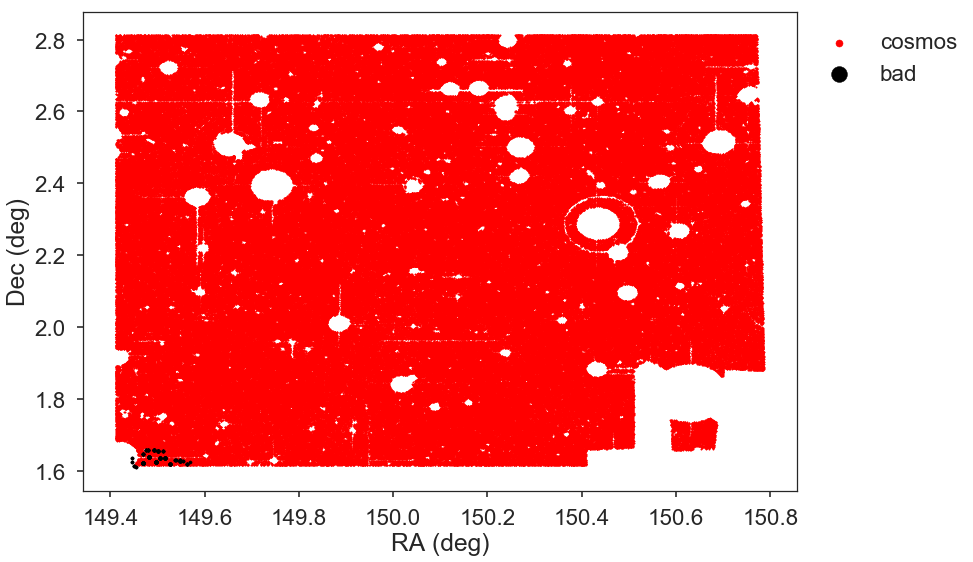

In [23]:
plt.scatter(c_cosmos.ra.deg,
         c_cosmos.dec.deg,
           color="r", s=2,
           label="cosmos")


plt.scatter(c_hsc[idx[mask_bad]].ra.deg,
         c_hsc[idx[mask_bad]].dec.deg,
           color="k", s=10,
           label="bad")


plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)")

plt.legend(loc="upper left", bbox_to_anchor=(1,1), markerscale=5)

In [24]:
print("min separation: ", min(sep.to(u.arcsec)))
print("max separation: ", max(sep.to(u.arcsec)))

min separation:  7.0966e-05arcsec
max separation:  60.1844arcsec


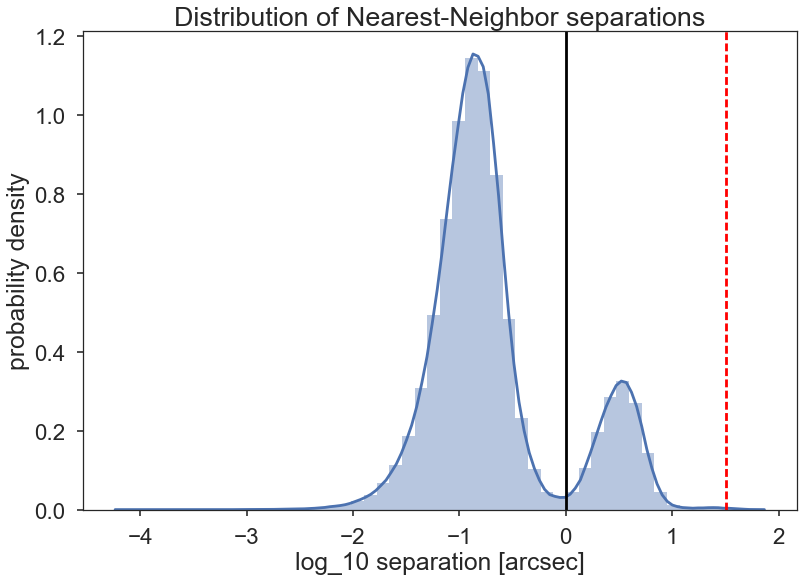

In [25]:
sns.distplot(np.log10(sep.to(u.arcsec).value))
plt.xlabel("log_10 separation [arcsec]")
plt.ylabel("probability density")
plt.axvline(np.log10(threshold_bad.value), linestyle="dashed", color="r")
plt.axvline(np.log10(threshold_match.value), linestyle="solid", color="k")

plt.title("Distribution of Nearest-Neighbor separations")

# Make the 2d completeness plot

In [26]:
masses = df_COSMOS[mask_COSMOS_downsample][~mask_bad].mass_med
photo_z = df_COSMOS[mask_COSMOS_downsample][~mask_bad].photo_z

matched = np.array(mask_matched[~mask_bad], dtype=float)


In [27]:
nbins=100
denominator, x_edges, y_edges = np.histogram2d(photo_z, masses,bins=nbins)
numerator, _, _ = np.histogram2d(photo_z, masses, bins=[x_edges, y_edges], weights=matched)

numerator = numerator.T
denominator = denominator.T

completeness = numerator / denominator

/Users/egentry/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide


In [28]:
completeness[np.isfinite(completeness)].min()

0.0

In [29]:
completeness[np.isfinite(completeness)].max()

1.0

In [30]:
xx, yy = np.meshgrid(x_edges[:-1], y_edges[:-1])
yy = 10**yy # get back into linear space for masses

#### Plot overall histogram of COSMOS Galaxies:


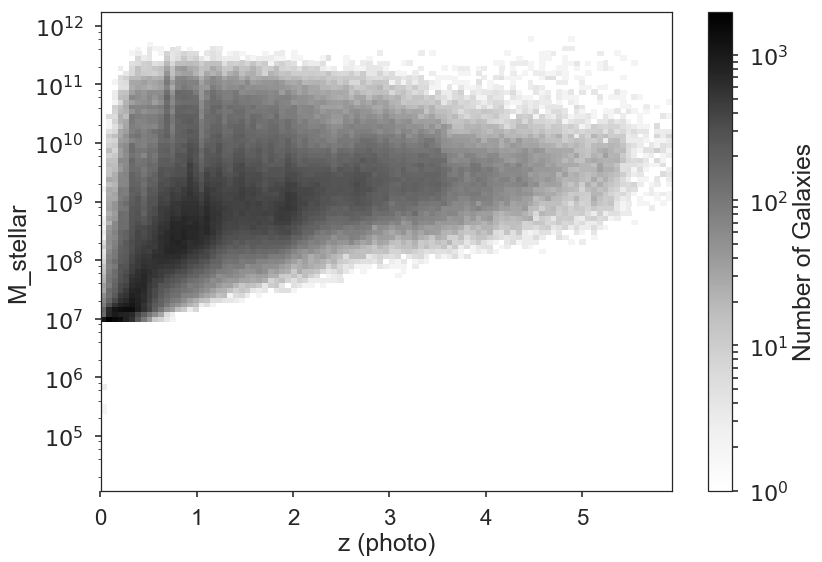

In [31]:

no_data_mask = (numerator >0)
# yy = 10**yy
plt.pcolormesh(xx, yy, denominator,
                 norm=colors.LogNorm(vmin=1, vmax=denominator.max()),
#                vmin=0, vmax=1, 
#                cmap=plt.cm.viridis_r, 
#                clip_on=False,
              )
plt.colorbar(label="Number of Galaxies")
plt.xlabel("z (photo)")
plt.ylabel("M_stellar")

# plt.contour(xx, yy, denominator, colors="r")

# plt.ylim(7, 12.5)
plt.yscale("log")

#### Plot completeness of COSMOS galaxies in HSC

/Users/egentry/anaconda3/lib/python3.5/site-packages/matplotlib/colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


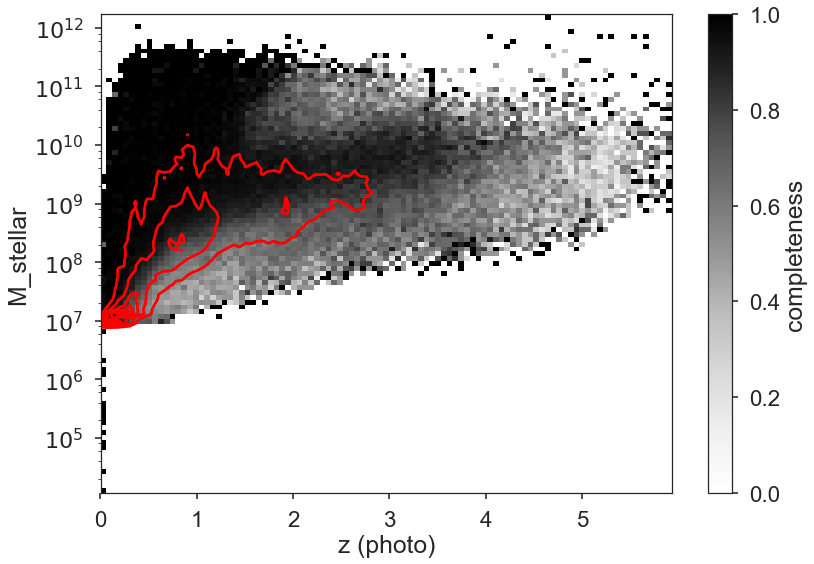

In [32]:

no_data_mask = (numerator>0)
plt.pcolormesh(xx, yy, completeness,
               vmin=0, vmax=1, 
#                cmap=plt.cm.viridis_r, 
              )
plt.colorbar(label="completeness")
plt.xlabel("z (photo)")
plt.ylabel("M_stellar")

plt.contour(xx, yy, denominator, colors="r",
#             norm=colors.LogNorm(vmin=100, vmax=denominator.max()),
           )

plt.yscale("log")